# Trading System with Moving Average Signals

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gld = pdr.get_data_yahoo('GLD', '2013-01-01')
gld.drop('Adj Close', axis=1, inplace=True)

In [3]:
gld['9-day'] = gld['Close'].rolling(9).mean()
gld['21-day'] = gld['Close'].rolling(21).mean()
gld['Change'] = np.log(gld.Close / gld.Close.shift())

In [4]:
gld.tail()

,High,Low,Open,Close,Volume,9-day,21-day,Change
Date,,,,,,,,
2018-12-27,120.900002,120.139999,120.570000,120.570000,11874400,118.746667,117.601428,0.007576
2018-12-28,121.080002,120.720001,120.800003,121.059998,6864700,119.191111,117.892381,0.004056
2018-12-31,121.260002,120.830002,120.980003,121.250000,8449400,119.566666,118.171905,0.001568
2019-01-02,121.750000,120.879997,121.349998,121.330002,12744900,119.920000,118.438095,0.000660
2019-01-03,122.110001,121.739998,121.779999,122.105202,5490354,120.439467,118.750724,0.006369


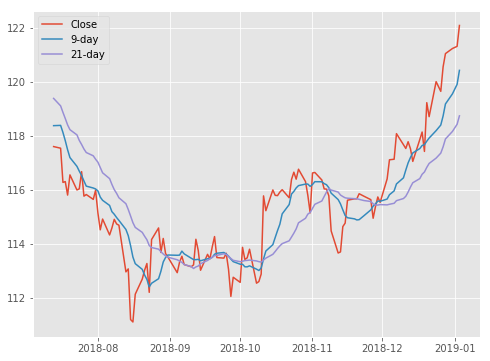

In [5]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    plt.plot(gld.Close[-120:])
    plt.plot(gld['9-day'][-120:])
    plt.plot(gld['21-day'][-120:])
    plt.legend(loc=2)

In [6]:
gld['position'] = np.where(gld['9-day'] > gld['21-day'], 1 , 0)
gld['position'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['position'])

In [7]:
gld.tail(10)

,High,Low,Open,Close,Volume,9-day,21-day,Change,position
Date,,,,,,,,,
2018-12-19,118.959999,117.400002,118.239998,117.430000,13827500,117.682222,116.668095,-0.006113,1
2018-12-20,119.739998,118.680000,119.110001,119.239998,18615100,117.810000,116.838095,0.015296,1
2018-12-21,119.250000,118.570000,119.190002,118.720001,13629800,117.925556,116.983333,-0.004370,1
2018-12-24,120.139999,119.570000,119.570000,120.019997,9736400,118.201111,117.181428,0.010891,1
2018-12-26,121.000000,119.570000,120.620003,119.660004,14293500,118.408889,117.366667,-0.003004,1
2018-12-27,120.900002,120.139999,120.570000,120.570000,11874400,118.746667,117.601428,0.007576,1
2018-12-28,121.080002,120.720001,120.800003,121.059998,6864700,119.191111,117.892381,0.004056,1
2018-12-31,121.260002,120.830002,120.980003,121.250000,8449400,119.566666,118.171905,0.001568,1
2019-01-02,121.750000,120.879997,121.349998,121.330002,12744900,119.920000,118.438095,0.000660,1


In [8]:
gld['system'] = gld['position'] * gld['Change']

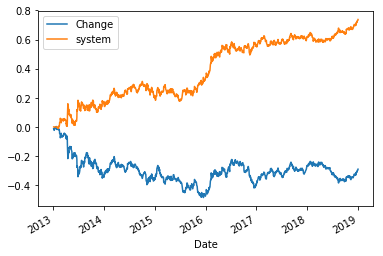

In [9]:
gld[['Change', 'system']].cumsum().plot()